In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
# import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
import matplotlib.pyplot as plt
import time                         
from sklearn.naive_bayes import GaussianNB
import datetime
import random
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from tabulate import tabulate
import tensorflow as tf

warnings.filterwarnings('ignore')
# from google.colab import files
# import io 

26    239177.976543
27    239052.226802
28    239348.642047
29    239322.332658
30    239511.454668
Name: predicted_mean, dtype: float64


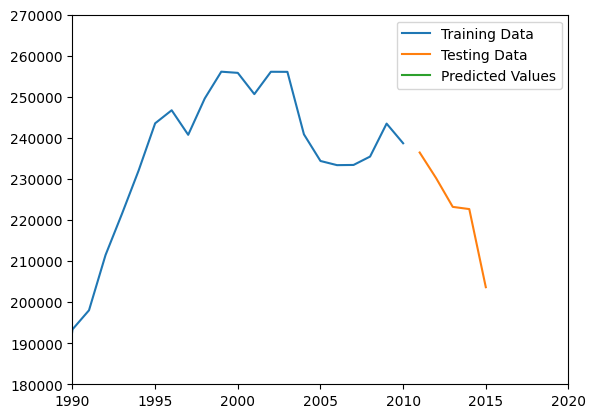

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
suicide_data = pd.read_csv('/content/drive/MyDrive/master1.csv')
suicide_data = suicide_data.groupby(['year']).sum().reset_index()
suicide_data = suicide_data[['year', 'suicides_no']]
suicide_data = suicide_data.set_index('year')

# Splitting the data into train and test sets
train_data = suicide_data[:len(suicide_data)-5]
test_data = suicide_data[len(suicide_data)-5:]

# Fitting the ARIMA model
model = ARIMA(train_data, order=(2, 1, 2))
model_fit = model.fit()

# Predicting the future values
prediction = model_fit.forecast(steps=5)
print(prediction)

# Plotting the predicted values against the actual values
plt.xlim([1990, 2020])
plt.ylim([180000, 270000])
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.plot(prediction, label='Predicted Values')
plt.legend()
plt.show()


<h2><b>Random Forest</b></h2>

In [126]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/master1.csv')

# Select features and target variable
X = data[['year', 'sex', 'age', 'country', 'gdp_per_capita']]
y = data['suicides_no']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)




RandomForestRegressor(random_state=42)

In [127]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
# for x,y in zip(y_test,y_pred):
#   print(x,y)
# # Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3287.7658057283134


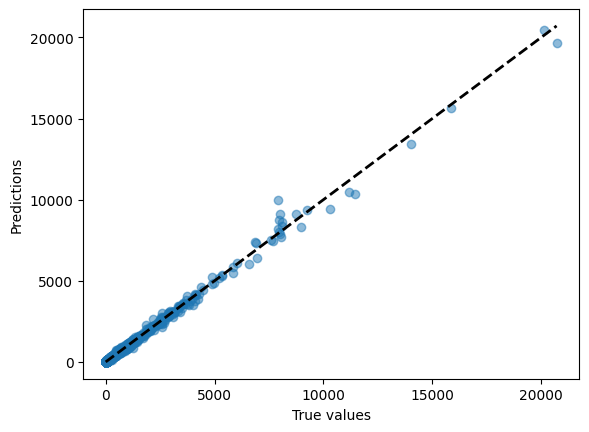

In [128]:
# Plot the prediction graph
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.5)
ax.plot([0, np.max(y_test)], [0, np.max(y_test)], 'k--', lw=2)
ax.set_xlabel('True values')
ax.set_ylabel('Predictions')
plt.show()


<h2><b>Predicting Suicide Numbers for 2015</b></h2>

Predicted suicide number for 2015: 237


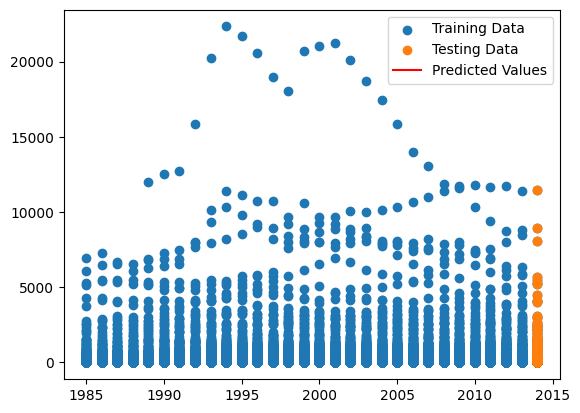

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
suicide_data = pd.read_csv('/content/drive/MyDrive/master1.csv')
suicide_data = suicide_data[['year', 'suicides_no']]

# Splitting the data into train and test sets
train_data = suicide_data[suicide_data['year'] < 2015]
test_data = suicide_data[suicide_data['year'] == 2014]

# Create the MLR model
mlr = LinearRegression()

# Train the model using the training data
X_train = train_data[['year']]
y_train = train_data[['suicides_no']]
mlr.fit(X_train, y_train)

# Predict the suicide rates for 2015
X_test = test_data[['year']]
y_pred = mlr.predict(X_test)
print("Predicted suicide number for 2015:", int(y_pred[0]))

# Plot the predicted values against the actual values
plt.scatter(train_data['year'], train_data['suicides_no'], label='Training Data')
plt.scatter(test_data['year'], test_data['suicides_no'], label='Testing Data')
plt.plot(X_test, y_pred, color='red', label='Predicted Values')
plt.legend()
plt.show()


In [130]:
df = pd.read_csv('/content/drive/MyDrive/master1.csv')
df.drop(['year'],inplace=True,axis=1)
X=df.drop(['suicides_no'],axis=1)
y=df.suicides_no
X.head()

,country,sex,age,population,gdp_for_year,gdp_per_capita,generation,continent
0,Albania,Male,15-24,312900.0,2.156625e+09,796,Generation X,Europe
1,Albania,Male,35-54,308000.0,2.156625e+09,796,Silent,Europe
2,Albania,Female,15-24,289700.0,2.156625e+09,796,Generation X,Europe
3,Albania,Male,75+,21800.0,2.156625e+09,796,G.I. Generation,Europe
4,Albania,Male,25-34,274300.0,2.156625e+09,796,Boomers,Europe


<h3>Pre-Processing Data</h3>

In [131]:
country_category={}
for i,x in enumerate(X.country.unique()):
  country_category[x]=i
age_category={}
for i,x in enumerate(X.age.unique()):
  age_category[x]=i
# print(country_category)
sex_category={'Male':1,'Female':0}
generation_category={}
for i,x in enumerate(X.generation.unique()):
  generation_category[x]=i
continent_category={}
for i,x in enumerate(X.continent.unique()):
  continent_category[x]=i
X.replace(country_category,inplace=True)
X.replace(age_category,inplace=True)
X.replace(sex_category,inplace=True)
X.replace(generation_category,inplace=True)
X.replace(continent_category,inplace=True)
# print(X.head())

  # print(x)

In [132]:
X['gdp_for_year'] = (X['gdp_for_year'] - X['gdp_for_year'].mean()) / X['gdp_for_year'].std()
X['population'] = (X['population'] - X['population'].mean()) / X['population'].std()
X['gdp_per_capita'] = (X['gdp_per_capita'] - X['gdp_per_capita'].mean()) / X['gdp_per_capita'].std()

In [133]:
for x in X.columns:
  print(x,": ",X[f'{x}'].unique())

country :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]
sex :  [1 0]
age :  [0 1 2 3 4 5]
population :  [-0.39399058 -0.39523733 -0.39989357 ...  0.22919678  0.1959777
 -0.10748309]
gdp_for_year :  [-0.30621431 -0.30623526 -0.30609218 ... -0.27223518 -0.26821989
 -0.26454138]
gdp_per_capita :  [-0.84874094 -0.85017293 -0.84677858 ... -0.78679403 -0.7769292
 -0.76849636]
generation :  [0 1 2 3 4 5]
continent :  [0 1 2 3 4]


In [134]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
len(X_train)

21993

<h2><b>Metrics</b></h2>

In [135]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn import preprocessing
def get_accuracy(y_test,y_pred):
  r2=r2_score(y_test, y_pred)
  mae=mean_absolute_error(y_test, y_pred)
  mse=mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  return [r2, mae, mse, rmse]

comparison=pd.DataFrame()

<h2><b>Linear Regression</b></h2>

In [136]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(get_accuracy(y_test,predictions))
comparison["LinearRegression"]=get_accuracy(y_test,predictions)

[0.37224832185634815, 257.1858715496875, 457840.74765383685, 676.6393039528792]


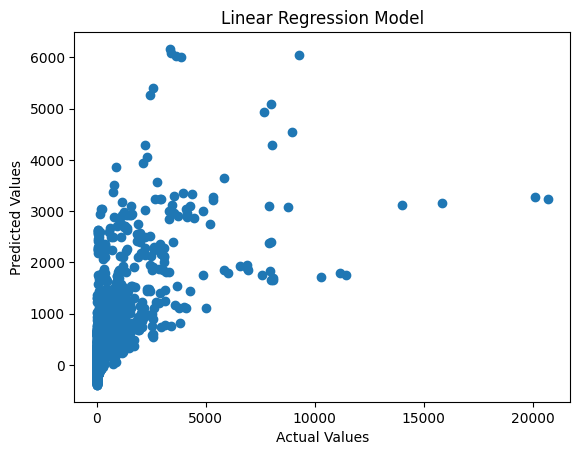

In [137]:
# Plot predicted vs actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()


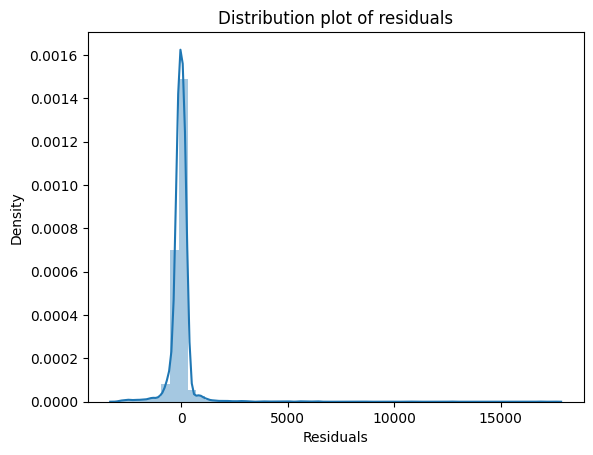

In [138]:
sns.distplot(y_test - predictions)
plt.xlabel('Residuals')
plt.title('Distribution plot of residuals')
plt.show()

<h2><b>Ridge Regression</b></h2>

In [139]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression model object
ridge_model = Ridge(alpha=0.5)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred = ridge_model.predict(X_test)
print(get_accuracy(y_test,y_pred))
comparison["Ridge"]=get_accuracy(y_test,y_pred)


[0.3722488710791684, 257.1758415644167, 457840.3470868685, 676.6390079554004]


<h2><b>Lasso Regression</b></h2>

In [140]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression model object
lasso_model = Lasso(alpha=0.1)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred = lasso_model.predict(X_test)
print(get_accuracy(y_test,y_pred))
comparison["Lasso"]=get_accuracy(y_test,y_pred)


[0.3722405401083817, 257.02719060317355, 457846.42314851267, 676.6434978247502]


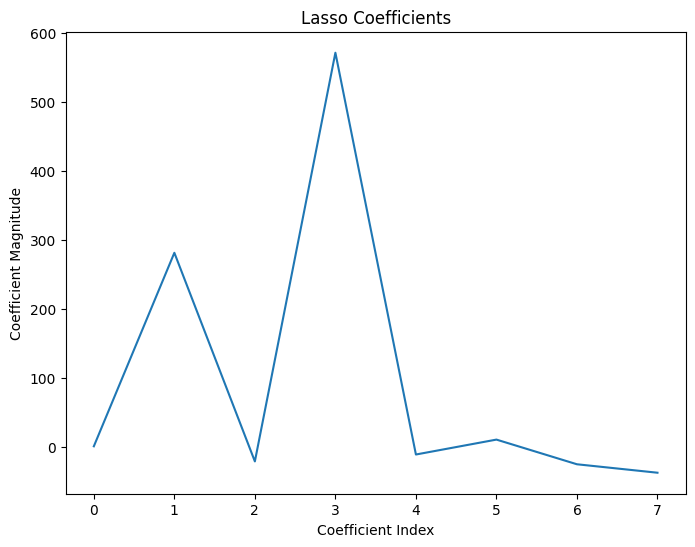

In [141]:
# Plot the coefficients
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(len(lasso_model.coef_)), lasso_model.coef_)
ax.set_title('Lasso Coefficients')
ax.set_xlabel('Coefficient Index')
ax.set_ylabel('Coefficient Magnitude')
plt.show()


<h2><b>Elastic Net</b></h2>

In [142]:
from sklearn.linear_model import ElasticNet

# Create an ElasticNet Regression model object
elasticnet_model = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Fit the model to the training data
elasticnet_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred = elasticnet_model.predict(X_test)
print(get_accuracy(y_test,y_pred))
comparison["ElasticNet"]=get_accuracy(y_test,y_pred)


[0.3529170461336609, 213.19178947113298, 471939.7075421643, 686.9786805586941]


<h2><b>Decision Tree</b></h2>

In [143]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model object
dt_model = DecisionTreeRegressor(max_depth=5)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred = dt_model.predict(X_test)
print(get_accuracy(y_test,y_pred))
comparison["DecisionTreeRegressor"]=get_accuracy(y_test,y_pred)


[0.7072752667532369, 131.599962650348, 213494.14966565676, 462.0542713422924]


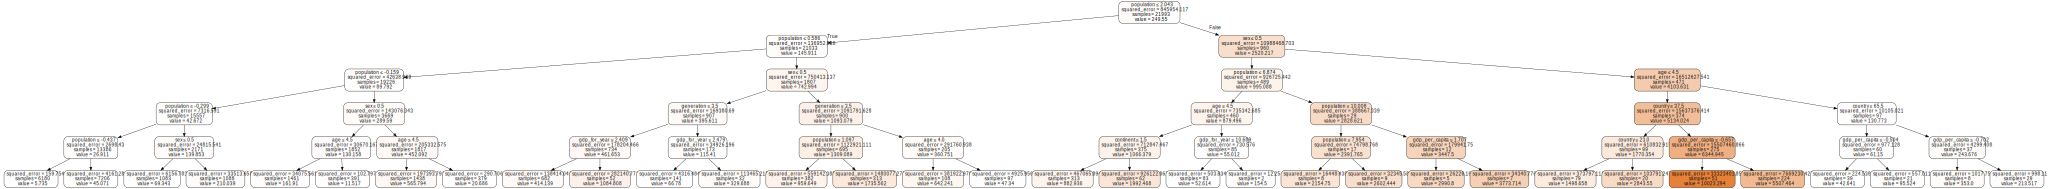

In [144]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize the decision tree
dot_data = export_graphviz(dt_model, out_file=None, 
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


<h2><b>Gradient Boosting Regression</b></h2>

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model object
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred = gb_model.predict(X_test)
print(get_accuracy(y_test,y_pred))
comparison["GradientBoostingRegressor"]=get_accuracy(y_test,y_pred)


[0.9667922489006047, 60.01292188484332, 24219.547506761934, 155.62630724515034]


<h2><b>K Neighbours Regression</b></h2>

In [146]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN Regression model object
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred = knn_model.predict(X_test)
print(get_accuracy(y_test,y_pred))
comparison["KNeighborsRegressor"]=get_accuracy(y_test,y_pred)

[0.9220965878961747, 42.985561011092926, 56817.620221858524, 238.3644692941012]


<h2><b>Multi Layer Perceptron</b></h2>

In [147]:
from sklearn.neural_network import MLPRegressor

# Create an MLP Regression model object
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500)

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred = mlp_model.predict(X_test)
print(get_accuracy(y_test,y_pred))
comparison["MLPRegressor"]=get_accuracy(y_test,y_pred)

[0.9012294538074672, 123.02516847548725, 72036.73409315657, 268.3965985126424]


<h2><b>Random Forest</b></h2>

In [148]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions on the test set
predictions = rf_model.predict(X_test)
# print(rf_model.evaluate(X_test,y_test))
prediction_df=pd.DataFrame()
prediction_df['Actual Y']=y_test
prediction_df['Predicted Y']=predictions
print(get_accuracy(y_test,predictions))


[0.9872709015483068, 22.960816512093107, 9283.766423877069, 96.35230367706352]


In [149]:
comparison["RandomForestRegressor"]=get_accuracy(y_test,predictions)

In [150]:
prediction_df
prediction_df.columns=['Actual','Predicted']
prediction_df = prediction_df.to_csv("/content/drive/MyDrive/Prediction_RandomForest.csv")

In [151]:
comparison.T

,0,1,2,3
LinearRegression,0.372248,257.185872,457840.747654,676.639304
Ridge,0.372249,257.175842,457840.347087,676.639008
Lasso,0.372241,257.027191,457846.423149,676.643498
ElasticNet,0.352917,213.191789,471939.707542,686.978681
DecisionTreeRegressor,0.707275,131.599963,213494.149666,462.054271
GradientBoostingRegressor,0.966792,60.012922,24219.547507,155.626307
KNeighborsRegressor,0.922097,42.985561,56817.620222,238.364469
MLPRegressor,0.901229,123.025168,72036.734093,268.396599
RandomForestRegressor,0.987271,22.960817,9283.766424,96.352304


In [152]:
comparison["RandomForestRegressor"]=get_accuracy(y_test,predictions)
df=comparison.T
df.columns=['R2 Square','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
df

,R2 Square,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
LinearRegression,0.372248,257.185872,457840.747654,676.639304
Ridge,0.372249,257.175842,457840.347087,676.639008
Lasso,0.372241,257.027191,457846.423149,676.643498
ElasticNet,0.352917,213.191789,471939.707542,686.978681
DecisionTreeRegressor,0.707275,131.599963,213494.149666,462.054271
GradientBoostingRegressor,0.966792,60.012922,24219.547507,155.626307
KNeighborsRegressor,0.922097,42.985561,56817.620222,238.364469
MLPRegressor,0.901229,123.025168,72036.734093,268.396599
RandomForestRegressor,0.987271,22.960817,9283.766424,96.352304


In [153]:
df=comparison.T
df.columns=['R2 Square','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
df.to_csv("/content/drive/MyDrive/Accuracy_Comparison.csv")

In [154]:
df=pd.read_csv("/content/drive/MyDrive/Accuracy_Comparison.csv")
df.columns=['Models','R2 Square','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
df

,Models,R2 Square,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.372248,257.185872,457840.747654,676.639304
1,Ridge,0.372249,257.175842,457840.347087,676.639008
2,Lasso,0.372241,257.027191,457846.423149,676.643498
3,ElasticNet,0.352917,213.191789,471939.707542,686.978681
4,DecisionTreeRegressor,0.707275,131.599963,213494.149666,462.054271
5,GradientBoostingRegressor,0.966792,60.012922,24219.547507,155.626307
6,KNeighborsRegressor,0.922097,42.985561,56817.620222,238.364469
7,MLPRegressor,0.901229,123.025168,72036.734093,268.396599
8,RandomForestRegressor,0.987271,22.960817,9283.766424,96.352304


<h2><b>Metrics Plot</b></h2>

In [155]:
import plotly.express as px

# Define the color codes for each metric
colors = {
    'R2 Square': 'blue',
    'Mean Absolute Error': 'green',
    'Mean Squared Error': 'red',
    'Root Mean Squared Error': 'orange'
}

# Create a bar plot for each metric
for metric in colors:
    fig = px.bar(df, x='Models', y=metric, color=metric, color_discrete_map={metric: colors[metric]})
    fig.show()